# Source Identification using 2 Class of image -Classic feature

In [1]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd
# matplotlib.pyplot as plt

## Understanding Data 

In [2]:
sony=pd.read_csv("./data/Sony.csv")
sony.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
0,77.609,85.581,39.656,2.1581,1.10270,0.51098,78.62,86.587,41.032,0.97753,0.87589,0.87595
1,89.970,90.172,95.999,0.9393,1.00220,1.06700,90.97,91.172,97.005,0.98673,0.93918,0.94600
2,110.860,83.149,52.016,1.5985,0.75006,0.46922,111.86,84.149,53.026,0.94989,0.89963,0.86718
3,114.920,93.979,73.656,1.2759,0.81776,0.64091,115.92,95.092,75.067,0.96410,0.95471,0.86722
4,141.660,129.560,112.400,1.1527,0.91463,0.79347,142.65,130.560,113.400,0.99246,0.92990,0.90939


In [3]:
nikon=pd.read_csv("./data/Nikkon.csv")
nikon.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
0,66.543,90.583,33.467,2.70660,1.36130,0.50294,67.557,91.583,36.560,0.97508,0.87301,0.88974
1,39.461,43.532,51.871,0.83922,1.10320,1.31450,40.463,44.532,53.178,0.97138,0.93462,0.91433
2,72.380,70.403,72.912,0.96558,0.97268,1.00740,73.380,71.403,73.919,0.92584,0.87915,0.69272
3,49.346,66.290,41.861,1.58360,1.34340,0.84833,50.591,67.290,44.441,0.92318,0.76962,0.92189
4,114.600,112.010,113.910,0.98325,0.97737,0.99402,115.600,113.010,114.910,0.94673,0.97429,0.95035


In [4]:
nikon.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,108.560469,98.378301,72.723270,1.697536,0.927287,0.669925,109.562021,99.378273,74.788154,0.913269,0.874333,0.841648
std,33.587789,27.780777,32.914887,1.337846,0.167066,0.243785,33.583195,27.780244,32.183200,0.089987,0.129972,0.164643
min,38.891000,32.541000,5.899600,0.809910,0.621510,0.113400,39.891000,33.541000,11.044000,0.388820,0.280580,-0.039719
25%,83.786000,78.433500,49.975500,1.082100,0.811030,0.493100,84.786000,79.433500,52.119500,0.880510,0.822380,0.797620
50%,105.610000,100.260000,71.704000,1.281900,0.922060,0.673300,106.610000,101.260000,72.797000,0.945040,0.916970,0.889740
75%,136.585000,118.515000,95.384500,1.765400,1.008000,0.855405,137.585000,119.515000,97.496500,0.971660,0.968430,0.945300
max,205.730000,161.100000,152.780000,12.126000,1.500100,1.319300,206.730000,162.100000,153.780000,0.998640,0.997680,0.994290


In [5]:
sony.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,127.005566,111.259832,83.986476,1.450554,0.886167,0.658258,128.005545,112.261755,85.087944,0.923914,0.892060,0.845493
std,35.908977,30.996853,32.925340,0.505937,0.117195,0.175517,35.907308,30.995405,32.892392,0.069391,0.103247,0.144820
min,39.485000,42.114000,17.140000,0.899850,0.636540,0.271350,40.488000,43.115000,18.494000,0.649700,0.507580,0.199950
25%,102.810000,90.610000,55.803000,1.131300,0.799680,0.515860,103.810000,91.610000,56.856000,0.888025,0.855800,0.812860
50%,123.700000,111.410000,82.740000,1.251700,0.893740,0.652190,124.700000,112.410000,83.740000,0.945750,0.917870,0.890220
75%,153.720000,130.695000,104.290000,1.617100,0.953030,0.782915,154.720000,131.695000,105.295000,0.971650,0.970895,0.937660
max,213.710000,200.190000,186.370000,4.475600,1.214400,1.094800,214.710000,201.190000,187.370000,0.997890,0.997680,0.995370


# Create trainig and testing data Frame

### Add Label Coloumn

In [6]:
sony.loc[:,'label'] = pd.Series(0, index=sony.index)

In [7]:
sony.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,label
0,77.609,85.581,39.656,2.1581,1.10270,0.51098,78.62,86.587,41.032,0.97753,0.87589,0.87595,0
1,89.970,90.172,95.999,0.9393,1.00220,1.06700,90.97,91.172,97.005,0.98673,0.93918,0.94600,0
2,110.860,83.149,52.016,1.5985,0.75006,0.46922,111.86,84.149,53.026,0.94989,0.89963,0.86718,0
3,114.920,93.979,73.656,1.2759,0.81776,0.64091,115.92,95.092,75.067,0.96410,0.95471,0.86722,0
4,141.660,129.560,112.400,1.1527,0.91463,0.79347,142.65,130.560,113.400,0.99246,0.92990,0.90939,0


In [8]:
nikon.loc[:,'label'] = pd.Series(1, index=nikon.index)
nikon.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,label
0,66.543,90.583,33.467,2.70660,1.36130,0.50294,67.557,91.583,36.560,0.97508,0.87301,0.88974,1
1,39.461,43.532,51.871,0.83922,1.10320,1.31450,40.463,44.532,53.178,0.97138,0.93462,0.91433,1
2,72.380,70.403,72.912,0.96558,0.97268,1.00740,73.380,71.403,73.919,0.92584,0.87915,0.69272,1
3,49.346,66.290,41.861,1.58360,1.34340,0.84833,50.591,67.290,44.441,0.92318,0.76962,0.92189,1
4,114.600,112.010,113.910,0.98325,0.97737,0.99402,115.600,113.010,114.910,0.94673,0.97429,0.95035,1


## Join Both data set & Normalise

In [9]:
data=pd.concat([sony,nikon])
data[140:148]

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,label
140,98.314,91.418,79.246,1.15360,0.92986,0.80605,99.314,92.420,80.254,0.99225,0.97818,0.97477,0
141,104.110,93.060,81.154,1.14670,0.89387,0.77951,105.110,94.060,82.154,0.99575,0.99287,0.98699,0
142,116.750,111.690,96.227,1.16060,0.95664,0.82423,117.750,112.690,97.237,0.98180,0.98010,0.97621,0
0,66.543,90.583,33.467,2.70660,1.36130,0.50294,67.557,91.583,36.560,0.97508,0.87301,0.88974,1
1,39.461,43.532,51.871,0.83922,1.10320,1.31450,40.463,44.532,53.178,0.97138,0.93462,0.91433,1
2,72.380,70.403,72.912,0.96558,0.97268,1.00740,73.380,71.403,73.919,0.92584,0.87915,0.69272,1
3,49.346,66.290,41.861,1.58360,1.34340,0.84833,50.591,67.290,44.441,0.92318,0.76962,0.92189,1
4,114.600,112.010,113.910,0.98325,0.97737,0.99402,115.600,113.010,114.910,0.94673,0.97429,0.95035,1


In [10]:
#select all coulomn except label
data[1:3].loc[:,data.columns != 'label']

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
1,89.97,90.172,95.999,0.9393,1.00220,1.06700,90.97,91.172,97.005,0.98673,0.93918,0.94600
2,110.86,83.149,52.016,1.5985,0.75006,0.46922,111.86,84.149,53.026,0.94989,0.89963,0.86718


In [11]:
Norm_feature=normalize(data.loc[:,data.columns != 'label'], norm='l2', axis=1, copy=True)

In [12]:
Norm_feature

array([[ 0.44592178,  0.49172689,  0.22785339, ...,  0.00561664,
         0.00503264,  0.00503299],
       [ 0.39666699,  0.39755758,  0.42324813, ...,  0.00435037,
         0.00414073,  0.0041708 ],
       [ 0.52658914,  0.39496086,  0.24707794, ...,  0.00451201,
         0.00427328,  0.00411914],
       ..., 
       [ 0.49116767,  0.4141216 ,  0.2701308 , ...,  0.00816619,
         0.00777423,  0.00781586],
       [ 0.46404325,  0.42739632,  0.30101349, ...,  0.00662857,
         0.00610638,  0.00575152],
       [ 0.37462103,  0.40770107,  0.41941423, ...,  0.00693873,
         0.0066366 ,  0.00665283]])

# Create train and test

In [13]:
#concatenate numpy array

#training Set
train_x=np.concatenate((Norm_feature[15:144], Norm_feature[160:]), axis=0)
train_y=np.concatenate((np.array(data[15:144].loc[:,"label"]),np.array(data[160:].loc[:,"label"])),axis=0)

#Testing Set
test_x=np.concatenate((Norm_feature[0:15], Norm_feature[144:160]), axis=0)
test_y=np.concatenate((np.array(data[0:15].loc[:,"label"]),np.array(data[144:160].loc[:,"label"])),axis=0)


# SVM Classifier

In [14]:
# clsf = classifier
clsf=SVC(kernel='rbf',gamma=20,C=10) #SVM Classier
svm={} #store accuracy data for plotting

In [15]:
#training
clsf.fit(train_x, train_y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=20, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Testing accuracy on training data

In [16]:
#Now testing for trainig data
#Now predict values for given classifier
prediction = clsf.predict(train_x)
svm["trainig_set"]=accuracy_score(prediction,train_y)*100
print 'Accuracy Check ',svm["trainig_set"],'%'

Accuracy Check  67.4509803922 %


### Testing accuracy on Testing data

In [17]:
prediction = clsf.predict(test_x)
svm["test_set"]=accuracy_score(prediction,test_y)*100
print 'Accuracy Check ',svm["test_set"],'%'

Accuracy Check  67.7419354839 %


In [18]:
svm

{'test_set': 67.741935483870961, 'trainig_set': 67.450980392156865}

# Decision Tree Classifier

In [110]:
decision={}
clf=DecisionTreeClassifier(max_depth=11,min_samples_split=2)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [111]:
#train
clf = clf.fit(train_x, train_y)

### Testing accuracy on training data

In [112]:
#Now testing for trainig data
#Now predict values for given classifier
prediction = clf.predict(train_x)
decision["trainig_set"]=accuracy_score(prediction,train_y)*100
print 'Accuracy Check ',decision["trainig_set"],'%'

Accuracy Check  90.5882352941 %


### Testing accuracy on Testing data

In [113]:
prediction = clf.predict(test_x)
decision["test_set"]=accuracy_score(prediction,test_y)*100
print 'Accuracy Check ',decision["test_set"],'%'

Accuracy Check  64.5161290323 %


In [114]:
decision

{'test_set': 64.516129032258064, 'trainig_set': 90.588235294117652}

# Neural Net Regressor

<ul>
<li>Uses Backpropagation for trainig</li>
<li></li>
</ul>

In [68]:
from sklearn.neural_network import MLPClassifier

In [69]:
neural=dict()
clf = MLPClassifier(algorithm='l-bfgs',hidden_layer_sizes=(50,), alpha=1e-5, random_state=1)
clf

MLPClassifier(activation='relu', algorithm='l-bfgs', alpha=1e-05,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [70]:
#trainig Network
clf.fit(train_x, train_y)

MLPClassifier(activation='relu', algorithm='l-bfgs', alpha=1e-05,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

### Testing accuracy on training data

In [71]:
#Now testing for trainig data
#Now predict values for given classifier
prediction = clf.predict(train_x)
neural["trainig_set"]=accuracy_score(prediction,train_y)*100
print 'Accuracy Check ',neural["trainig_set"],'%'

Accuracy Check  70.1960784314 %


### Testing accuracy on testing data

In [72]:
prediction = clf.predict(test_x)
neural["test_set"]=accuracy_score(prediction,test_y)*100
print 'Accuracy Check ',neural["test_set"],'%'

Accuracy Check  70.9677419355 %


In [73]:
neural

{'test_set': 70.967741935483872, 'trainig_set': 70.196078431372541}

## Ploting

In [118]:
import pylab as plt
plt.rcParams['figure.figsize'] = 16, 12

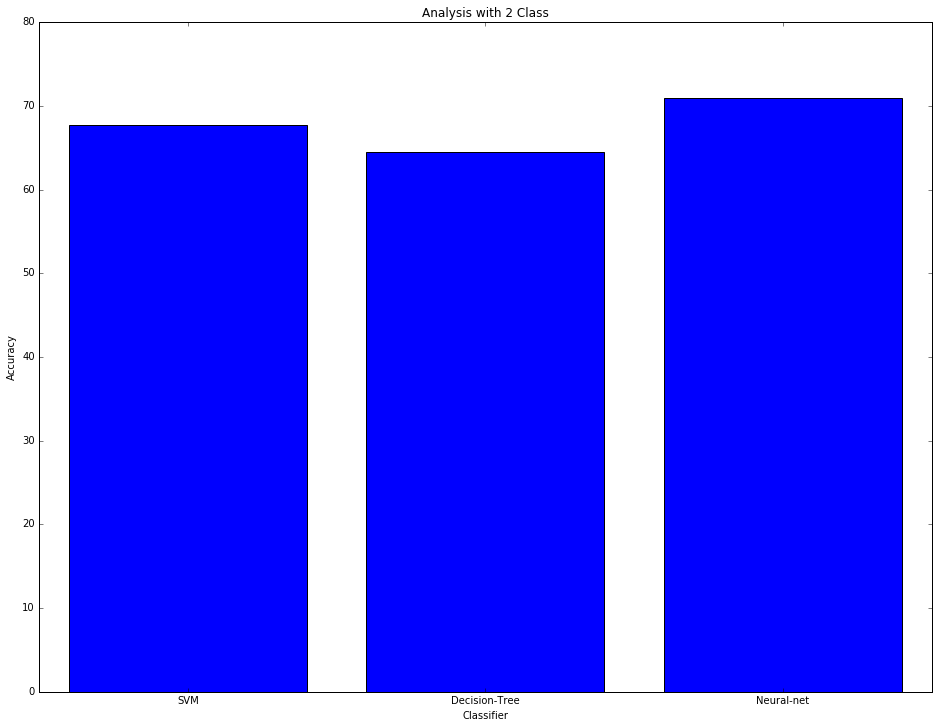

In [119]:
#%pylab inline
classifier = [1,2,3]
accuracy_test_data=[svm["test_set"],decision["test_set"],neural["test_set"]]
LABELS=["SVM","Decision-Tree","Neural-net"]

plt.bar(classifier,accuracy_test_data,align='center')
plt.xticks(classifier, LABELS) #binding label with x axis data
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Analysis with 2 Class')
plt.show()
                    